In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

# import warnings
# warnings.filterwarnings("ignore")

import os
os.chdir("E:/EBAC/Material/M18")

drugs = pd.read_csv("drugs.csv")
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [2]:
feature_cols = ["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]
X = drugs[feature_cols].values
y = drugs.Drug

In [3]:
from sklearn import preprocessing

Cod_Sex = preprocessing.LabelEncoder()
Cod_Sex.fit(np.unique(X[:,1]))
X[:,1] = Cod_Sex.transform(X[:,1])

Cod_BP = preprocessing.LabelEncoder()
Cod_BP.fit(np.unique(X[:,2]))
X[:,2] = Cod_BP.transform(X[:,2])

Cod_Cholesterol = preprocessing.LabelEncoder()
Cod_Cholesterol.fit(np.unique(X[:,3]))
X[:,3] = Cod_Cholesterol.transform(X[:,3])

In [4]:
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [5]:
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [6]:
# Creación de grupos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [8]:
# Score F1 para el grupo de entrenamiento y prueba
rf.score(X_train, y_train)
rf.score(X_test, y_test)

print("training F1 Score: ,", rf.score(X_train, y_train))
print("testing F1 Score: ,", rf.score(X_test, y_test))

training F1 Score: , 1.0
testing F1 Score: , 0.95


In [9]:
# Estadísticas de desempeño generales
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       0.67      1.00      0.80         4
       drugB       1.00      0.67      0.80         6
       drugC       1.00      0.75      0.86         4
       drugX       0.95      1.00      0.97        19
       drugY       1.00      1.00      1.00        27

    accuracy                           0.95        60
   macro avg       0.92      0.88      0.89        60
weighted avg       0.96      0.95      0.95        60



In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importance(df, model):
    n_features = feature_cols
    plt.barh(n_features, model.feature_importances_, align="center")
    plt.xlabel("Importancia de las variables")
    plt.ylabel("Caracteristicas")
    plt.show()

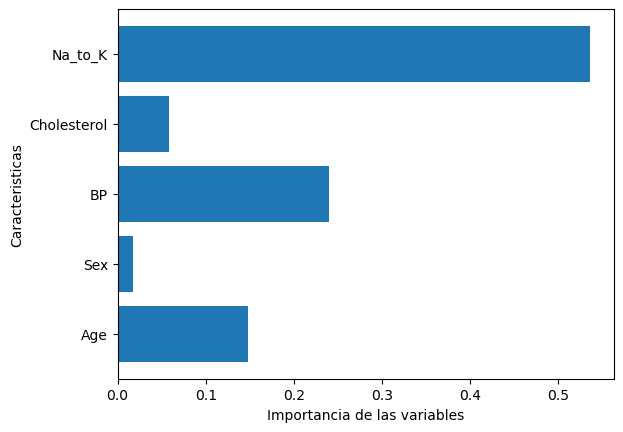

In [11]:
plot_feature_importance(drugs,rf)

El método Rando Forest parece ajustarse muy bien de primera instancia con una precisión general de 95% y valores F1 bastante altos tambien con la caracteristica Na_to_K siendo la mas importante, seguida por la presión sanguinea.

# Gradient boosted trees

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

gbt = GradientBoostingClassifier(n_estimators=100, random_state=1) # 100 árboles de profundidad de 3 (Default)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [13]:
# Score F1 para el grupo de entrenamiento y prueba
gbt.score(X_train, y_train)
gbt.score(X_test, y_test)

print("training F1 Score: ", gbt.score(X_train, y_train))
print("testing F1 Score: ", gbt.score(X_test, y_test))

training F1 Score:  1.0
testing F1 Score:  1.0


In [14]:
# Estadísticas de desempeño general
y_pred = gbt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       1.00      1.00      1.00         2
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        13
       drugY       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



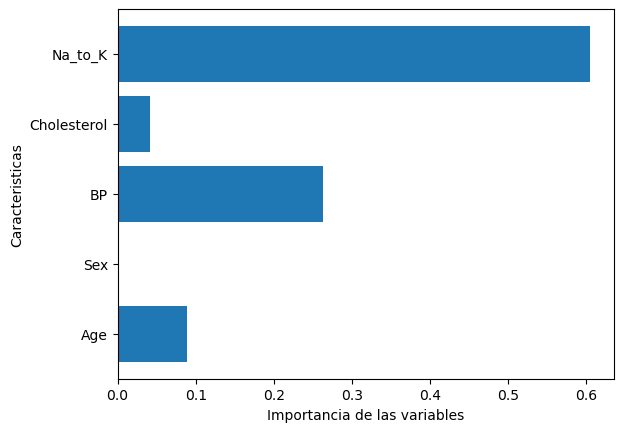

In [15]:
plot_feature_importance(drugs,gbt)

Con el metodo GradientBoosting obtenemos una precision de 100% resaltando la caracteristica de Na to K como la mas importante, aunque generalmente tener un modelo 100% centero podria considerarse que hubo un sobre ajuste y que posiblemente la informacion no fuera confiable, al haber trabajado con esta base de datos anteriormente y conocer como se desempeño con modelos anteriores, consideraria que es confiable.

# Intento alternativo de Gradient Boosting

In [16]:
gbt = GradientBoostingClassifier(n_estimators=100, random_state=1, max_depth=2)
gbt.fit(X_train,y_train)
print("training F1 Score: ", gbt.score(X_train, y_train))
print("testing F1 Score: ", gbt.score(X_test, y_test))

training F1 Score:  1.0
testing F1 Score:  1.0


In [17]:
y_pred = gbt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       1.00      1.00      1.00         2
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        13
       drugY       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



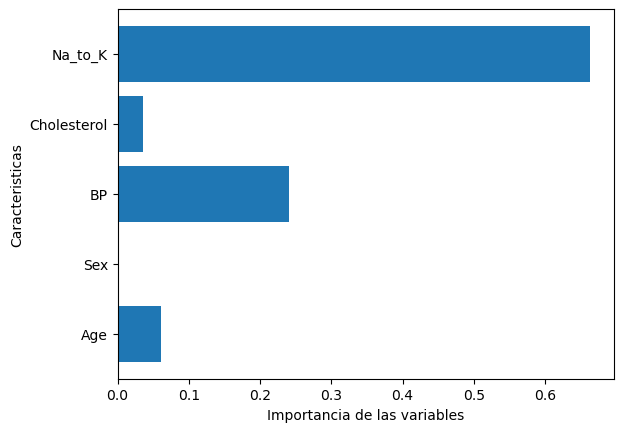

In [18]:
plot_feature_importance(drugs, gbt)

Utilizando la forma alterna con un maximo de profundidad de 2 obtenemos los mismos scores y precision pero podemos observar una mayor ponderacion para la caracteristica Na to K y menor para presión sanguinea y la edad; aunque creo que los resultados pueden ser confiables, me inclinaria a utilizar el resultado anterior para no apoyarse tanto en una sola caracteristica.

# AdaBoost Classifier

In [19]:
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

# AdaBoost usa árboles de decisión como clasificador por Default
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
# Entrenamiento del clasificador AdaBoost
model = abc.fit(X_train, y_train)

y_pred = model.predict(X_test)

C:\Users\BlewOs\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       0.67      1.00      0.80         4
       drugB       0.00      0.00      0.00         2
       drugC       0.00      0.00      0.00         4
       drugX       0.76      1.00      0.87        13
       drugY       1.00      1.00      1.00        17

    accuracy                           0.85        40
   macro avg       0.49      0.60      0.53        40
weighted avg       0.74      0.85      0.79        40



C:\Users\BlewOs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\BlewOs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\BlewOs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
# Utilización de SVM como clasificar para AdaBoost
from sklearn.svm import SVC

svc = SVC(probability=True, kernel="linear")

In [22]:
# Creación del objeto de clasificaci[on AdaBoost
abc = AdaBoostClassifier(n_estimators=50, estimator = svc, learning_rate=1)

model = abc.fit(X_train, y_train)

y_pred = model.predict(X_test)

C:\Users\BlewOs\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         4
       drugB       0.00      0.00      0.00         2
       drugC       0.00      0.00      0.00         4
       drugX       0.00      0.00      0.00        13
       drugY       0.42      1.00      0.60        17

    accuracy                           0.42        40
   macro avg       0.08      0.20      0.12        40
weighted avg       0.18      0.42      0.25        40



C:\Users\BlewOs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\BlewOs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\BlewOs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Utilizando el método de AdaBoost Classifier con el estimador SVC nos da un resultado diferente con incluso menor precision general, para este caso el metodo que se ajusta mejor para nuestros datos seria el de Gradient Boosting Trees.

# Probar modelo Gradient Boosting Trees con un nuevo paciente

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

gbt = GradientBoostingClassifier(n_estimators=100, random_state=1) # 100 árboles de profundidad de 3 (Default)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
y_pred = gbt.predict(X_test)
print(classification_report(y_test, y_pred))